In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

import gym
env = gym.make('CarRacing-v0')

import numpy as np
import itertools as it

from agent import DQNAgent

import torch
import torch.nn.functional as F
import torch.optim as optim

In [2]:
a = np.ones(12)
a[1] = 9
a[2] = 9
a[3] = 9
b = np.ones(3, dtype='int32')
b[0] = 1
b[1] = 2
b[2] = 3

a[b]

array([9., 9., 9.])

In [3]:
agent = DQNAgent(env)

---------- Initializing -----------
Action Map ->  [[-1.   1.   0.3]
 [-1.   1.   0. ]
 [-1.   0.   0.3]
 [-1.   0.   0. ]
 [ 0.   1.   0.3]
 [ 0.   1.   0. ]
 [ 0.   0.   0.3]
 [ 0.   0.   0. ]
 [ 1.   1.   0.3]
 [ 1.   1.   0. ]
 [ 1.   0.   0.3]
 [ 1.   0.   0. ]]
---------- Model ---------
DQN(
  (conv1): Conv2d(3, 8, kernel_size=(4, 4), stride=(2, 2))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=29584, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=12, bias=True)
)


In [4]:
scores = []
frames_in_episodes = []
for i in range(1000):
    score, frames = agent.play_episode()
    scores.append(score)
    frames_in_episodes.append(frames)
    print(i, score, frames)
    if i % 500 == 0:
        torch.save(agent.training_model.state_dict(), 'checkpoint.pth')

Track generation: 1047..1313 -> 266-tiles track
0 12.509433962264097 30
Track generation: 1070..1346 -> 276-tiles track
retry to generate track (normal if there are not many of this messages)
Track generation: 1156..1449 -> 293-tiles track
1 13.12054794520541 38
Track generation: 1175..1473 -> 298-tiles track
2 -7.597979797979768 26
Track generation: 1135..1423 -> 288-tiles track
3 0.3745644599302693 25
Track generation: 1106..1387 -> 281-tiles track
4 -6.071428571428555 25
Track generation: 1176..1474 -> 298-tiles track
5 -0.5639730639731084 25
Track generation: 1108..1389 -> 281-tiles track


KeyboardInterrupt: 

In [ ]:
for _ in range(20):
    env.render()
    obs, r, d, _ = env.step(env.action_space.sample())
    
plt.imshow(obs)

In [5]:
obs = env.reset()

Track generation: 1109..1390 -> 281-tiles track


In [6]:
env.close()

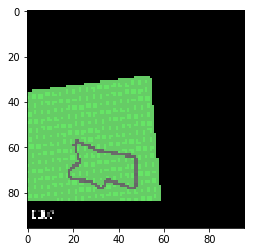

In [12]:
plt.imshow(obs)

In [13]:
ob2 = np.swapaxes(obs, 0, 2)

In [14]:
ob2.shape

(3, 96, 96)

In [ ]:
obs.shape

In [15]:
o = np.reshape(obs, (3,96,96))

In [17]:
o == ob2

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ..., False, False, False],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [6]:
from torchvision import transforms    

o = transforms.ToPILImage()(obs)

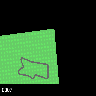

In [10]:
o

In [ ]:
torch.device('cpu')

In [ ]:
agent.training_model.load_state_dict(torch.load('checkpoint.pth', map_location='cpu'))

for i in range(3):
    state = env.reset()
    for j in range(200):
        action_idx = agent.get_action(state)
        print(action_idx)
        env.render()
        state, reward, done, _ = env.step(agent.action_map[action_idx])
        if done:
            break 
            
env.close()

In [ ]:
state = env.reset()
state = process_image(state)
for _ in range(1000):
    print('-------------------------------------')
    env.render()
    action_idx = get_random_action()
    action = all_actions[action_idx]
    print('Action -> ', action)
    next_state, reward, done, info = env.step(env.action_space.sample())
    print('Reward ->', reward)
    print('Done ->', done)
    next_state = process_image(next_state)
    print(next_state.shape)
    memory.add(state, action_idx, reward, next_state, done)
    state = next_state    
    print('-------------------------------------')


In [ ]:
4e-4

In [ ]:
env.close()

In [2]:
a = [1,2,3,4,5,6]
a[-2:]

[5, 6]